# Regression

-----------------

## Exercise - Use simple linear regression on the `Auto` data set.

1. Use `statsmodels` or `scikit-learn` to perform a simple linear regression with
`mpg` as the response and `horsepower` as the predictor. Print the results. Comment on the output.
For example:
    - Is there a relationship between the predictor and the response?
    - How strong is the relationship between the predictor and the response?
    - Is the relationship between the predictor and the response positive or negative?
    - What is the predicted `mpg` associated with a `horsepower` of 98? *Optional: What are the associated 95% confidence and prediction intervals?*

2. Plot the response and the predictor. Plot the least squares regression line.

3. Produce [diagnostic plots](http://data.library.virginia.edu/diagnostic-plots/) of the least squares regression fit. Comment on any problems you see with the fit.

In [36]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
% matplotlib inline

In [35]:
auto_data = pd.read_csv('Auto.csv')

In [4]:
auto_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [42]:
results = smf.ols('mpg ~ horsepower', data=auto_data).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Sun, 02 Jul 2017   Prob (F-statistic):           7.03e-81
Time:                        23:17:27   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Horsepower does not really seem to be very highly correlated with mpg - R2 is 0.606. The relationship is negative - the higher the horsepower, the lower the MPG generally.

2) Plot the response and the predictor. Plot the least squares regression line.

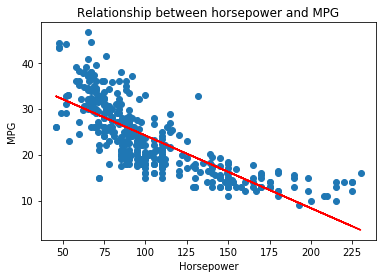

In [48]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(auto_data.mpg, auto_data.horsepower)
plt.scatter(auto_data.horsepower, auto_data.mpg)
plt.plot(auto_data.horsepower, results.fittedvalues, color='r')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('Relationship between horsepower and MPG')
plt.show()

3) Produce diagnostic plots of the least squares regression fit. Comment on any problems you see with the fit.

## Exercise - Use multiple linear regression on the `Auto` data set.

1. Produce a scatterplot matrix which includes all of the variables
in the data set.

2. Compute the matrix of correlations between the variables using
the function corr(). Plot a matrix correlation heatmap as well.

3. Perform a multiple linear regression with `mpg` as the response and all other variables except `name` as the predictors. Print the results. Comment on the output. For instance:
    - Is there a relationship between the predictors and the response?
    - Which predictors appear to have a statistically significant relationship to the response?
    - What does the coefficient for the year variable suggest?
4. Produce diagnostic plots of the linear
regression fit. Comment on any problems you see with the fit.
Do the residual plots suggest any unusually large outliers? Does
the leverage plot identify any observations with unusually high
leverage?

5. Use the - and + symbols to fit linear regression models with
interaction effects. Do any interactions appear to be statistically
significant?

6. Try a few different transformations of the variables, such as
$log(X)$, $\sqrt{X}$, $X^2$. Comment on your findings.

1) Produce a scatterplot matrix which includes all of the variables in the data set.

2) Compute the matrix of correlations between the variables using the function corr(). Plot a matrix correlation heatmap as well.

3) Perform a multiple linear regression with mpg as the response and all other variables except name as the predictors. Print the results. Comment on the output.

4) Produce diagnostic plots of the linear regression fit. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?

5) Use the - and + symbols to fit linear regression models with interaction effects. Do any interactions appear to be statistically significant?

6) Try a few different transformations of the variables, such as $log(X)$, $\sqrt{X}$, $X^2$. Comment on your findings.

## Exercise - Use multiple regression using the `Carseats` data set.

1. Fit a multiple regression model to predict `Sales` using `Price`,
`Urban`, and `US`.

2. Provide an interpretation of each coefficient in the model. Be
careful—some of the variables in the model are qualitative!

3. Write out the model in equation form, being careful to handle
the qualitative variables properly.

4. For which of the predictors can you reject the null hypothesis
H: β = 0?

5. On the basis of your response to the previous question, fit a
smaller model that only uses the predictors for which there is
evidence of association with the outcome.

6. How well do the models in (1) and (5) fit the data?

7. Using the model from (5), obtain 95% confidence intervals for
the coefficient(s).

8. Is there evidence of outliers or high leverage observations in the
model from (5)?

1) Fit a multiple regression model to predict Sales using Price, Urban, and US.

2) Provide an interpretation of each coefficient in the model. Be careful—some of the variables in the model are qualitative!

3) Write out the model in equation form, being careful to handle the qualitative variables properly.

4) For which of the predictors can you reject the null hypothesis H: β = 0?

5) On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.

6) How well do the models in (1) and (4) fit the data ?

7) Using the model from (e), obtain 95% confidence intervals for the coefficient(s).

8) Is there evidence of outliers or high leverage observations in the model from (5) ?

## Exercise - Investigate the t-statistic for the null hypothesis. 

In this problem we will investigate the t-statistic for the null hypothesis
H: β = 0 in simple linear regression without an intercept. To
begin, we generate a predictor x and a response y as follows.

    import numpy as np
    np.random.seed(1)
    x = np.random.randn(100)
    y = 2 * x + np.random.randn(100)

1. Perform a simple linear regression of y onto x, without an intercept.
Report the coefficient estimate β, the standard error of
this coefficient estimate, and the t-statistic and p-value associated
with the null hypothesis H: β = 0. Comment on these
results. (You can perform regression without an intercept)

2. Now perform a simple linear regression of x onto y without an
intercept, and report the coefficient estimate, its standard error,
and the corresponding t-statistic and p-values associated with
the null hypothesis H: β = 0. Comment on these results.

3. What is the relationship between the results obtained in (1) and
(2)?

4. For the regrssion of Y onto X without an intercept, the t-statistic for H0:β=0 takes the form β^/SE(β^), where β^ is given by (3.38), and where


$$SE(\hat{\beta}) = \sqrt{\frac{\sum_{i=1}^n(y_i - x_i\hat{\beta})^2}{(n - 1)\sum_{i=1}^nx_i^2}}$$

*Confirm numerically in Python, that the t-statistic can be written as*

$$\frac{\sqrt{n - 1}\sum_{i=1}^nx_iy_i}{\sqrt{(\sum_{i=1}^nx_i^2)(\sum_{i=1}^ny_i^2) - (\sum_{i=1}^nx_iy_i)}}$$

'5. Using the results from (4), argue that the t-statistic for the regression of y onto x is the same t-statistic for the regression of x onto y.

'6. In Python, show that when regression is performed with an intercept, the t-statistic for H0:β1=0 is the same for the regression of y onto x as it is the regression of x onto y.

In [2]:
import numpy as np
np.random.seed(1)
x = np.random.randn(100)
y = 2 * x + np.random.randn(100)

1) Perform a simple linear regression of y onto x, without an intercept. Report the coefficient estimate β^, the standard error of this coefficient estimate, and the t-statistic and p-value associated with the null hypothesis H0. Comment on these results.

2) Now perform a simple linear regression of x onto y, without an intercept. Report the coefficient estimate β^, the standard error of this coefficient estimate, and the t-statistic and p-value associated with the null hypothesis H0. Comment on these results.

3) What is the relationship between the results obtained in (1) and (2)?

4) For the regrssion of Y onto X without an intercept, the t-statistic for H0:β=0 takes the form β^/SE(β^), where β^ is given by (3.38), and where

$$SE(\hat{\beta}) = \sqrt{\frac{\sum_{i=1}^n(y_i - x_i\hat{\beta})^2}{(n - 1)\sum_{i=1}^nx_i^2}}$$

Show algebraically, and confirm numerically in Python, that the t-statistic can be written as 

$$\frac{\sqrt{n - 1}\sum_{i=1}^nx_iy_i}{\sqrt{(\sum_{i=1}^nx_i^2)(\sum_{i=1}^ny_i^2) - (\sum_{i=1}^nx_iy_i)}}$$

We have

$$t = \frac{\sum_ix_iy_y/\sum_jx_j^2}{\sqrt{\sum_i(y_i - x_i\hat{\beta})^2/(n - 1)\sum_jx_j^2}} = \frac{\sqrt{n - 1}\sum_ix_iy_i}{\sqrt{\sum_jx_j^2\sum_i(y_i - x_i\sum_jx_jy_j/\sum_jx_j^2)^2}} = \frac{\sqrt{n - 1}\sum_ix_iy_i}{\sqrt{(\sum_jx_j^2)(\sum_jy_j^2) - (\sum_jx_jy_j)^2}}$$

Now let’s verify this result numerically.

5) Using the results from (4), argue that the t-statistic for the regression of y onto x is the same t-statistic for the regression of x onto y.

6) In Python, show that when regression is performed with an intercept, the t-statistic for H0:β1=0 is the same for the regression of y onto x as it is the regression of x onto y.

## Exercise - Explore linear regression without an intercept. 

1. Recall that the coefficient estimate β^ for the linear regression of Y onto X witout an intercept is given by (3.38). Under what circumstance is the coefficient estimate for the regression of X onto Y the same as the coefficient estimate for the regression of Y onto X ?

1. Generate an example in Python with n = 100 observations in which
the coefficient estimate for the regression of X onto Y is different
from the coefficient estimate for the regression of Y onto X.

1. Generate an example in Python with n = 100 observations in which
the coefficient estimate for the regression of X onto Y is the
same as the coefficient estimate for the regression of Y onto X.

1) Recall that the coefficient estimate β^ for the linear regression of Y onto X witout an intercept is given by (3.38). Under what circumstance is the coefficient estimate for the regression of X onto Y the same as the coefficient estimate for the regression of Y onto X?

The coefficient estimate for the regression of Y onto X is

$$\hat{\beta} = \frac{\sum_ix_iy_i}{\sum_jx_j^2}$$

The coefficient estimate for the regression of X onto Y is

$$\hat{\beta}' = \frac{\sum_ix_iy_i}{\sum_jy_j^2}$$

The coefficients are the same iff $\sum_jx_j^2 = \sum_jy_j^2$

2) Generate an example in Python with n = 100 observations in which the coefficient estimate for the regression of X onto Y is different from the coefficient estimate for the regression of Y onto X.

3) Generate an example in Python with n = 100 observations in which the coefficient estimate for the regression of X onto Y is the same as the coefficient estimate for the regression of Y onto X.

## Exercise - Explore linear regression with simulated data.

In this exercise you will create some simulated data and will fit simple
linear regression models to it. Make sure to set the seed prior to
starting part (1) to ensure consistent results.

1. Create a vector, x, containing 100 observations drawn from a N(0, 1) distribution. This represents a feature, X. 

2. Create a vector, eps, containing 100 observations drawn from a N(0, 0.25) distribution i.e. a normal distribution with mean zero and variance 0.25.

3. Using x and eps, generate a vector y according to the model 

> Y = −1 + 0.5X + e

What is the length of the vector `y`? What are the values of β0 and β1 in this linear model?

4. Create a scatterplot displaying the relationship between x and
y. Comment on what you observe.

5. Fit a least squares linear model to predict y using `x`. Comment
on the model obtained. How do β0 and β1 compare to β0 and
β1?

6. Display the least squares line on the scatterplot obtained in (4).
Draw the population regression line on the plot, in a different
color. Create an appropriate legend.

7. Now fit a polynomial regression model that predicts `y` using `x`
and `x^2`. Is there evidence that the quadratic term improves the
model fit? Explain your answer.

8. Repeat (1)–(6) after modifying the data generation process in
such a way that there is less noise in the data. The model (3.39)
should remain the same. You can do this by decreasing the variance
of the normal distribution used to generate the error term
`e` in (2). Describe your results.

9. Repeat (1)–(6) after modifying the data generation process in
such a way that there is more noise in the data. The model
(3.39) should remain the same. You can do this by increasing
the variance of the normal distribution used to generate the
error term  in (b). Describe your results.

10. What are the confidence intervals for β0 and β1 based on the
original data set, the noisier data set, and the less noisy data
set? Comment on your results.

1) Create a vector, x, containing 100 observations drawn from a N(0, 1) distribution. This represents a feature, X. 

2) Create a vector, eps, containing 100 observations drawn from a N(0, 0.25) distribution i.e. a normal distribution with mean zero and variance 0.25.

3) Using x and eps, generate a vector y according to the model

    Y = −1 + 0.5X + e

What is the length of the vector y? What are the values of β0 and β1 in this linear model?

4) Create a scatterplot displaying the relationship between x and y. Comment on what you observe.

5) Fit a least squares linear model to predict `y` using `x`. Comment on the model obtained. How do β^0 and β^1 compare to β0 and β1?

6) Display the least squares line on the scatterplot obtained in (4). Draw the population regression line on the plot, in a different color. Use the legend() function to create an appropriate legend.

7) Now fit a polynomial regression model that predicts y using x and $x^2$. Is there evidence that the quadratic term improves the model fit ? Explain your answer.

8) Repeat (1)-(6) after modifying the data generation process in such a way that there is less noise in the data. The initial model should remain the same. Describe your results.

9) Repeat (1)-(6) after modifying the data generation process in such a way that there is more noise in the data. The initial model should remain the same. Describe your results.

10) What are the confidence intervals for β0 and β1 based on the original data set, the noisier data set, and the less noisy data set ? Comment on your results.

## Exercise - Explore the problem of collinearity.

Perform the following commands:

> np.random.seed(8)

> x1 = np.random.rand(100)

> x2 = .5 * x1 + np.random.rand(100) / 10

> y = 2 + 2 * x1 + .3 * x2 + np.random.randn(100)

1. The last line corresponds to creating a linear model in which y is
a function of x1 and x2. Write out the form of the linear model.
What are the regression coefficients?

2. What is the correlation between x1 and x2? Create a scatterplot
displaying the relationship between the variables.

3. Using this data, fit a least squares regression to predict y using
x1 and x2. Describe the results obtained. What are β0, β1, and β2? How do these relate to the true β0, β1, and β2? Can you reject the null hypothesis Ho:β1 = 0? How about the null
hypothesis Ho:β2 = 0?

4. Now fit a least squares regression to predict y using only x1.
Comment on your results. Can you reject the null hypothesis
Ho: β1 = 0?

5. Now fit a least squares regression to predict y using only x2.
Comment on your results. Can you reject the null hypothesis
Ho: β1 = 0?

6. Do the results obtained in (3)–(5) contradict each other? Explain
your answer.

7. Now suppose we obtain one additional observation, which was unfortunately mismeasured.

> x1=c(x1 , 0.1)

> x2=c(x2 , 0.8)

> y=c(y,6)

Re-fit the linear models from (3) to (5) using this new data. What
effect does this new observation have on the each of the models?
In each model, is this observation an outlier? A high-leverage
point? Both? Explain your answers.

1) The last line corresponds to creating a linear model in which y is a function of x1 and x2. Write out the form of the linear model. What are the regression coefficients?

2) What is the correlation between x1 and x2? Create a scatterplot displaying the relationship between the variables.

3) Using this data, fit a least squares regression to predict y using x1 and x2. Describe the results obtained. What are β0, β1, and β2? How do these relate to the true β0, β1, and β2? Can you reject the null hypothesis Ho:β1 = 0? How about the null hypothesis Ho:β2 = 0?

4) Now fit a least squares regression to predict `y` using only `x1`. Comment on your results. Can you reject the null hypothesis H0:β1=0 ?

5) Now fit a least squares regression to predict y using only x2. Comment on your results. Can you reject the null hypothesis Ho: β1 = 0?

6) Do the results obtained in (3)–(5) contradict each other? Explain your answer.

## Exercise - Predict per capita crime rate. 

This problem involves the `Boston` data set. We will now try to predict per capita crime rate
using the other variables in this data set. In other words, per capita
crime rate is the response, and the other variables are the predictors.

1. For each predictor, fit a simple linear regression model to predict
the response. Describe your results. In which of the models is
there a statistically significant association between the predictor
and the response? Create some plots to back up your assertions.

2. Fit a multiple regression model to predict the response using
all of the predictors. Describe your results. For which predictors
can we reject the null hypothesis H: β = 0?

2. How do your results from (1) compare to your results from (2)?
Create a plot displaying the univariate regression coefficients
from (1) on the x-axis, and the multiple regression coefficients
from (2) on the y-axis. That is, each predictor is displayed as a
single point in the plot. Its coefficient in a simple linear regression
model is shown on the x-axis, and its coefficient estimate
in the multiple linear regression model is shown on the y-axis.

3. Is there evidence of non-linear association between any of the
predictors and the response? To answer this question, for each
predictor X, fit a model of the form
Y = β0 + β1X + β2X^2 + β3X^3 + E.

1) For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions.

2) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H: β = 0?

3) How do your results from (1) compare to your results from (2)? Create a plot displaying the univariate regression coefficients from (1) on the x-axis, and the multiple regression coefficients from (2) on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.

3) Is there evidence of non-linear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form $Y = β0 + β1X + β2X^2 + β3X^3 + E$.